In [ ]:
#1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [ ]:
#2
df = pd.read_excel('/content/PCA1.xlsx', index_col='Plot_No_1')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 1405 to 0
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      161 non-null    int64 
 1   A2      161 non-null    int64 
 2   A3      161 non-null    int64 
 3   A4      161 non-null    int64 
 4   A5      161 non-null    int64 
 5   A6      161 non-null    int64 
 6   A7      161 non-null    int64 
 7   B1      161 non-null    int64 
 8   B2      161 non-null    int64 
 9   B3      161 non-null    int64 
 10  B4      161 non-null    int64 
 11  B5      161 non-null    object
 12  B6      161 non-null    int64 
 13  B7      161 non-null    object
 14  B8      161 non-null    object
 15  B9      161 non-null    object
dtypes: int64(12), object(4)
memory usage: 21.4+ KB


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
df.drop(df.columns[[5,6,11,13,14,15]], axis = 1, inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 1405 to 0
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      161 non-null    int64
 1   A2      161 non-null    int64
 2   A3      161 non-null    int64
 3   A4      161 non-null    int64
 4   A5      161 non-null    int64
 5   B1      161 non-null    int64
 6   B2      161 non-null    int64
 7   B3      161 non-null    int64
 8   B4      161 non-null    int64
 9   B6      161 non-null    int64
dtypes: int64(10)
memory usage: 13.8 KB


In [ ]:
#4
X_scaled = StandardScaler().fit_transform(df)
X_scaled[:5]

array([[ 0.84303094,  0.60631801,  0.83582462, -0.60262396,  0.76354172,
        -0.73908252, -0.75224531, -0.57101409, -0.78098553, -0.387287  ],
       [ 0.84303094,  0.60631801,  0.83582462, -0.60262396,  0.76354172,
        -0.73908252, -0.75224531, -0.57101409, -0.78098553, -0.387287  ],
       [ 0.84303094,  0.60631801,  0.83582462, -0.60262396,  0.76354172,
        -0.73908252, -0.75224531, -0.57101409, -0.78098553, -0.387287  ],
       [ 0.84303094,  0.60631801,  0.83582462, -0.60262396,  0.76354172,
        -0.73908252, -0.75224531, -0.57101409, -0.78098553, -0.387287  ],
       [ 0.84303094,  0.60631801,  0.83582462, -0.60262396,  0.76354172,
        -0.73908252, -0.75224531, -0.57101409, -0.78098553, -0.387287  ]])

In [ ]:
#5
pca=PCA(n_components=3)
# pca=PCA()
pca.fit(X_scaled)
x_pca=pca.transform(df)
print(x_pca)
x_pca.shape
df3 = pd.DataFrame(pca.components_, columns=list(df.columns))
df3
#pca.components_


[[ -35.6813727    -8.86861951   29.90760486]
 [ -35.6813727    -8.86861951   29.90760486]
 [ -35.6813727    -8.86861951   29.90760486]
 [ -35.6813727    -8.86861951   29.90760486]
 [ -35.6813727    -8.86861951   29.90760486]
 [ -33.96190345   -7.60622793   28.47426165]
 [ 357.62551287 -384.26242829   27.99831098]
 [ 357.62551287 -384.26242829   27.99831098]
 [ 221.55970257 -246.39604057  -13.0072959 ]
 [ -31.5442418    -4.28325309   28.45967456]
 [ -32.38320636   -6.05986955   28.12402964]
 [ 261.59496278 -278.32022135  138.19768141]
 [ -31.73868527   -5.62148878   27.73358889]
 [ -31.73868527   -5.62148878   27.73358889]
 [ -30.88830563   -3.67789844   27.4330704 ]
 [ -30.88830563   -3.67789844   27.4330704 ]
 [ -35.6813727    -8.86861951   29.90760486]
 [ -35.6813727    -8.86861951   29.90760486]
 [ -31.73868527   -5.62148878   27.73358889]
 [ -35.6813727    -8.86861951   29.90760486]
 [ -25.4529422   -20.30450402   18.58107644]
 [ 254.10976701 -278.72063841  139.98892193]
 [ -32.078

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,A1,A2,A3,A4,A5,B1,B2,B3,B4,B6
0,-0.339344,-0.305198,-0.339323,0.232758,-0.362095,0.340672,0.341107,0.292241,0.361797,0.206296
1,-0.266821,-0.049123,-0.389258,0.523612,-0.195108,-0.373918,-0.340024,-0.326740,-0.303800,0.090285
2,0.351421,0.199909,0.190531,0.258399,0.027659,0.032282,0.188638,-0.323615,0.163027,0.751513


In [ ]:
# number of components
n_pcs=pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(df.columns)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df4 = pd.DataFrame(dic.items())
df4

,0,1
0,PC0,A5
1,PC1,A4
2,PC2,B6


In [ ]:
comp=pd.DataFrame(abs(x_pca))
comp

,0,1,2
0,35.681373,8.868620,29.907605
1,35.681373,8.868620,29.907605
2,35.681373,8.868620,29.907605
3,35.681373,8.868620,29.907605
4,35.681373,8.868620,29.907605
...,...,...,...
156,25.452942,20.304504,18.581076
157,35.681373,8.868620,29.907605
158,30.209656,3.794792,28.004538
159,35.681373,8.868620,29.907605


In [ ]:
print(comp.min(), 
      comp.max(), 
      comp.mean()
      )

0    25.452942
1     3.677898
2    13.007296
dtype: float64 0    504.415252
1    388.505130
2    674.251050
dtype: float64 0    152.184922
1    122.839724
2    110.864958
dtype: float64


In [ ]:
comp.to_csv('file2.csv') 

In [ ]:
comp.columns = ["PC1", "PC2", "PC3"]

In [ ]:
comp


,PC1,PC2,PC3
0,35.681373,8.868620,29.907605
1,35.681373,8.868620,29.907605
2,35.681373,8.868620,29.907605
3,35.681373,8.868620,29.907605
4,35.681373,8.868620,29.907605
...,...,...,...
156,25.452942,20.304504,18.581076
157,35.681373,8.868620,29.907605
158,30.209656,3.794792,28.004538
159,35.681373,8.868620,29.907605


In [ ]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5),
      pca.explained_variance_ratio_)

Components =  3 ;
Total explained variance =  0.97756 [0.72914949 0.17486359 0.07354838]


In [ ]:
lst=list(df.columns.values.tolist()) 

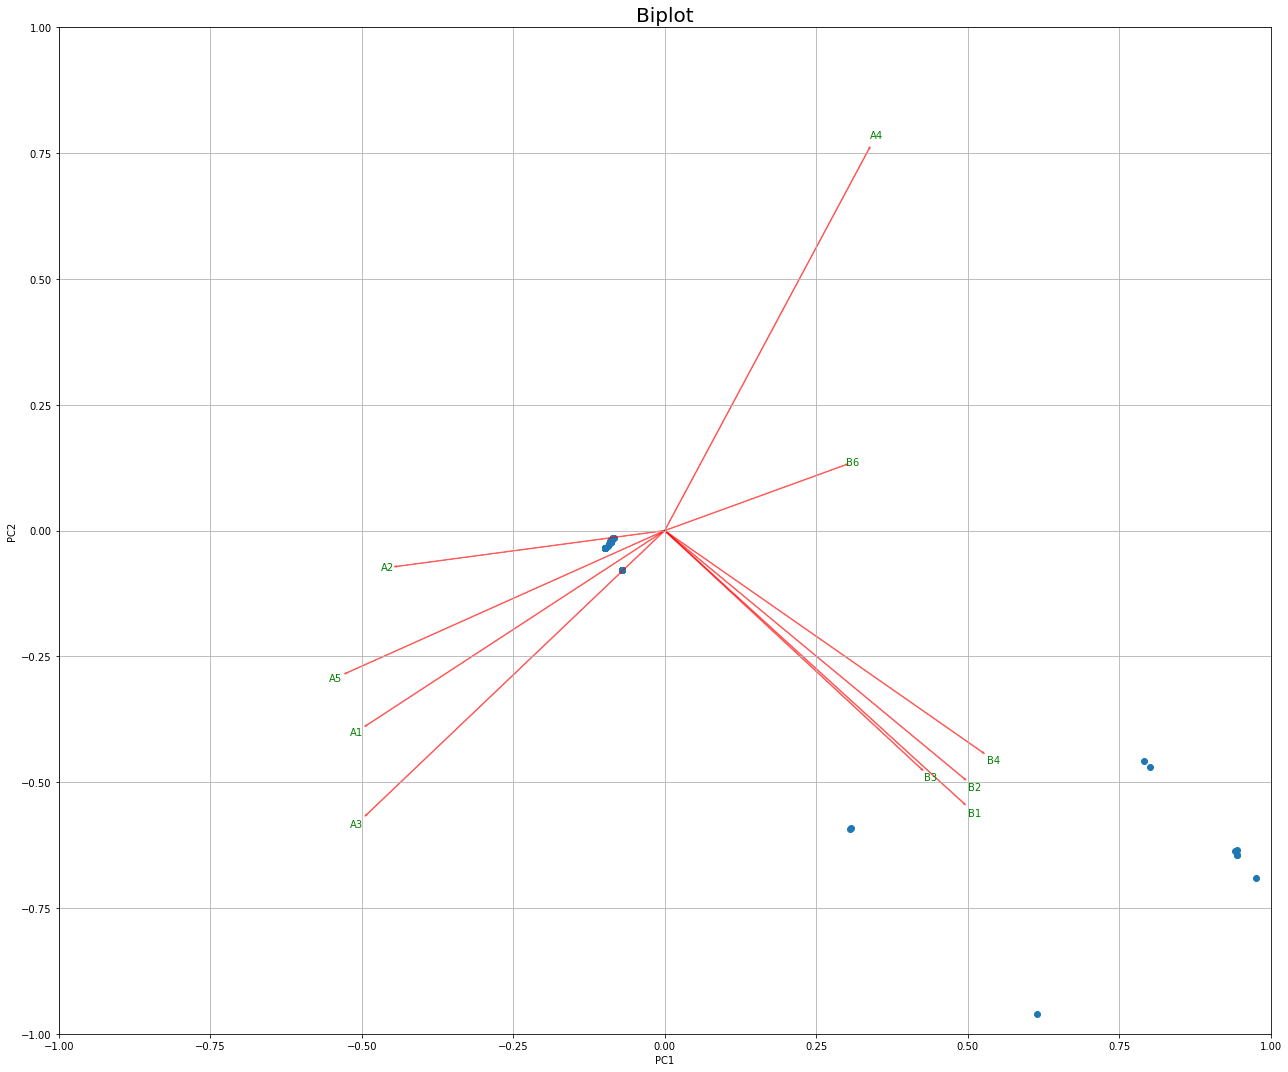

In [54]:
#6
def myplot(score,coeff,labels=None):
    plt.figure(figsize=(18,15))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex*1.5,ys * scaley*1.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*1.45, coeff[i,1]*1.45, color = 'r',alpha = 0.5, )
        if labels is None:
            # plt.text(coeff[i,0]* 2.5, coeff[i,1] *2.5, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
            plt.text(coeff[i,0]* 1.5, coeff[i,1] *1.5, str(lst[i]), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.5, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.title('Biplot', fontdict = {'fontsize' : 20})
    plt.tight_layout()

    return
#Call the function. Use only the 2 PCs.
myplot(x_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
# plt.savefig('/content/drive/Shared drives/Monami-Extra Space/Suhi Apu/PCA.jpg')
plt.show()